**Import Library's**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import hdbscan
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


**KMeans Clustering**

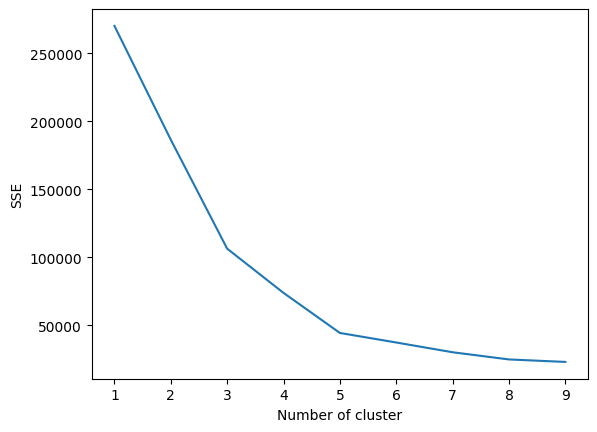

In [4]:
#first of all we are finding the best value of k with the help of elbow mathod
sse=[]
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

plt.xlabel('Number of cluster')
plt.ylabel("SSE")
plt.plot(range(1,10),sse)



#from this we can say that the optimal value of k is  = 5

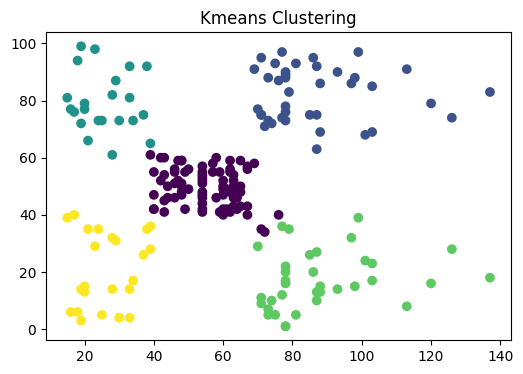

In [5]:
#now lets make the KMeans plot with k=5
kmeans = KMeans(n_clusters = 5,random_state =42)
kmeans_labels = kmeans.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c = kmeans_labels , cmap = 'viridis')
plt.title("Kmeans Clustering")
plt.show()

**Agglomerative Algorithm**

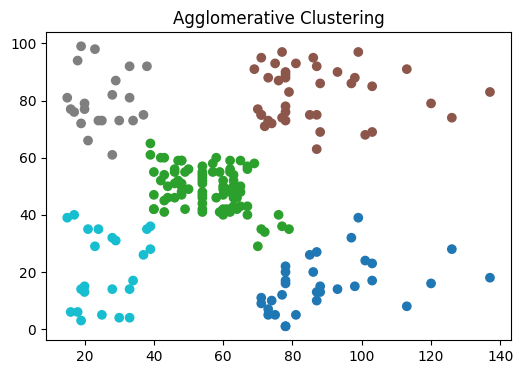

In [6]:
agg = AgglomerativeClustering(n_clusters = 5)
agg_labels = agg.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c = agg_labels , cmap = 'tab10')
plt.title("Agglomerative Clustering")
plt.show()

**DBSCAN Algorithm**

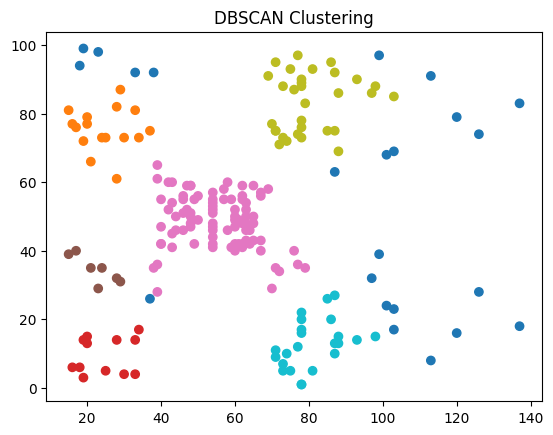

In [7]:
dbscan = DBSCAN(eps = 9,min_samples = 5)
db_label = dbscan.fit_predict(X)
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c = db_label , cmap = 'tab10')
plt.title("DBSCAN Clustering")
plt.show()

**HDBSCAN Algorithm**

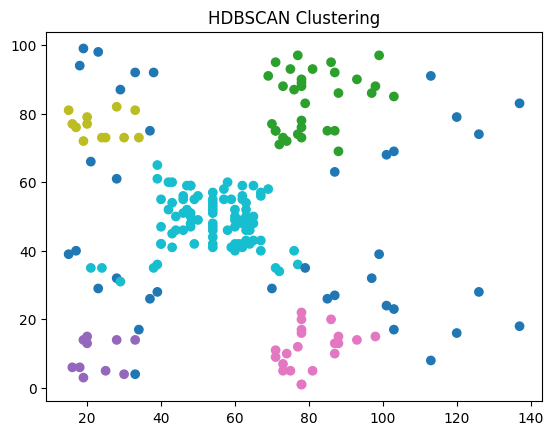

In [8]:
#here we wrote hdbscan.HDBSCAN cause small hdbscan is library ,as we know it has his own library
hdb = hdbscan.HDBSCAN(min_cluster_size = 5)
hdb_labels = hdb.fit_predict(X)
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c = hdb_labels , cmap = 'tab10')
plt.title("HDBSCAN Clustering")
plt.show()

**Now We checking SILHOUETTE SCORE**

In [9]:
from sklearn.metrics import silhouette_score
print("KMeans Score :" ,round(silhouette_score(X,kmeans_labels),3))
print("Agglomerative Score :" ,round(silhouette_score(X,agg_labels),3))
print("DBSCAN Score :" ,round(silhouette_score(X,db_label),3))
print("HDBSCAN Score :" ,round(silhouette_score(X,hdb_labels),3))

KMeans Score : 0.554
Agglomerative Score : 0.553
DBSCAN Score : 0.436
HDBSCAN Score : 0.381


**NOW WE APPLYING PCA(Principal Component Analysis) TO REDUCE DIMENSIONS OF FEATURE**

Explained varince by PCA is : [0.44266167 0.33308378].


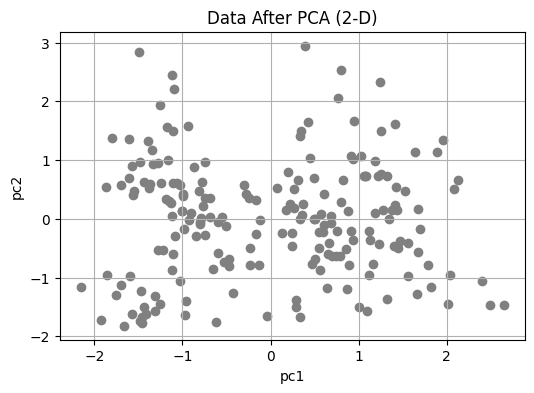

In [16]:
#basically in real world project we have more than two feature ,at that time we have multi dimensional feature so to reduce the dimensionality of feature 
# Without any data,accuracy loss we  use pca there is more two like pca which works on non-linear data 2)t-sne and 3)umap . but pca is working on linear data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
#standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

#apply pca to reduce into 2 dimension
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

#checking explained Variance :
print(f"Explained varince by PCA is : {pca.explained_variance_ratio_}.")

#ploting
plt.figure(figsize = (6,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c ='gray')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("Data After PCA (2-D)")
plt.grid(True)
plt.show()

**LETS APPLY PCA ON KMeans**

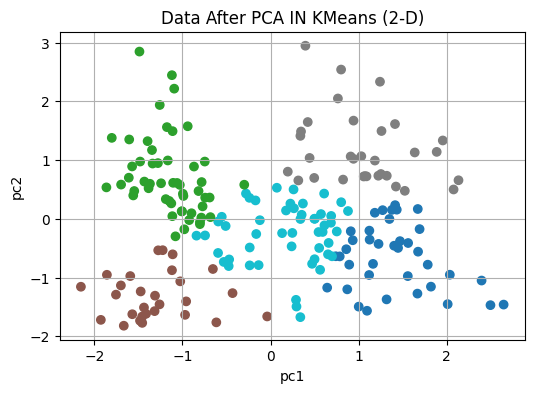

In [18]:
kmeans_pca = KMeans(n_clusters=5,random_state=42)
kmeans_labels = kmeans_pca.fit_predict(x_pca)

#ploting
plt.figure(figsize = (6,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c = kmeans_labels, cmap = 'tab10')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("Data After PCA IN KMeans (2-D)")
plt.grid(True)
plt.show()